# Role with GPT4

In [ ]:
# ============================================================
# Mars Crater Classifier: Impact Crater vs Volcanic Depression
# ============================================================

# Step 1: Import Required Libraries
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

# Set random seed for reproducibility
tf.random.set_seed(42)

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths
base_dir = '/content/drive/MyDrive/Dissertation/FinalDataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Step 3: Load Dataset with ImageDataGenerator
# Images are grayscale, so color_mode='grayscale'
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Data Augmentation for training set to help generalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

# Validation and test sets should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

# Step 4: Build CNN Model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),

        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

model = build_model()
model.summary()

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Define EarlyStopping Callback
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True,
                           verbose=1)

# Step 7: Train the Model
EPOCHS = 30

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# Step 8: Evaluate the Model
print("\nEvaluating on test data:")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


Mounted at /content/drive
Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 467s 6s/step - accuracy: 0.5447 - loss: 0.6828 - val_accuracy: 0.7433 - val_loss: 0.5861
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.6869 - loss: 0.5985 - val_accuracy: 0.7533 - val_loss: 0.5319
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7635 - loss: 0.5099 - val_accuracy: 0.7867 - val_loss: 0.4925
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7621 - loss: 0.5137 - val_accuracy: 0.8133 - val_loss: 0.4399
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7760 - loss: 0.4785 - val_accuracy: 0.8267 - val_loss: 0.3899
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7954 - loss: 0.4511 - val_accuracy: 0.8600 - val_loss: 0.3347
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8301 - loss: 0.4011 - val_accuracy: 0.8833 - val_loss: 0.2886
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8642 - loss: 0.3338 - val_accuracy: 0.8267 - val_los

# Analysis

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc:.4f}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.9351 - loss: 0.1668
Validation Accuracy: 0.9433


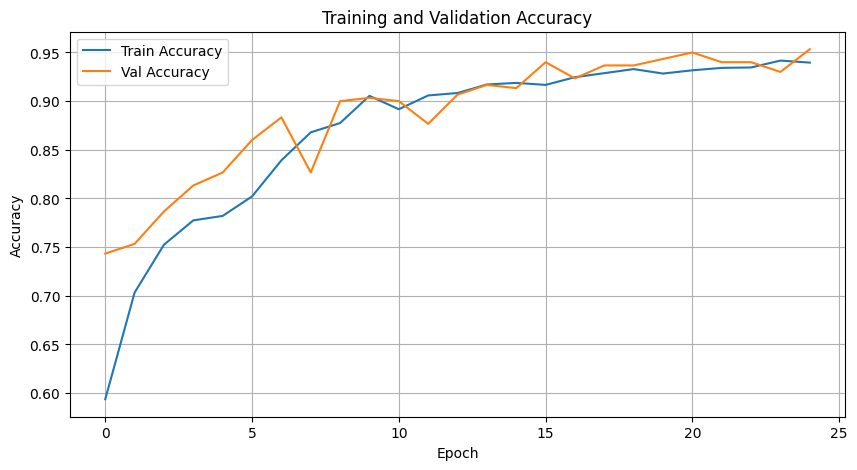

In [ ]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step
              precision    recall  f1-score   support

      Impact       0.92      0.89      0.91       150
    Volcanic       0.90      0.92      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



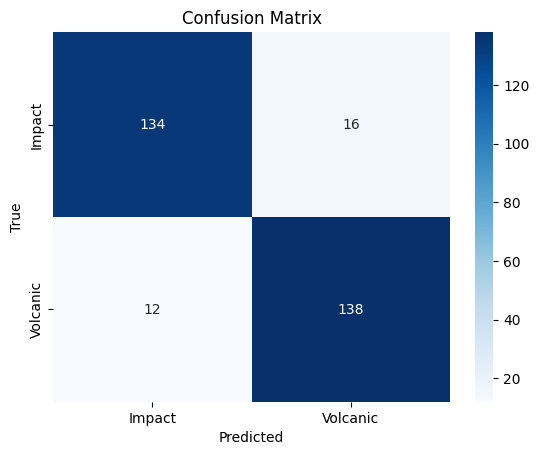

In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predicted probabilities and class predictions
y_probs = model.predict(test_generator).ravel()
y_pred = (y_probs > 0.5).astype(int)
y_true = test_generator.classes

# Classification report & confusion matrix
print(classification_report(y_true, y_pred, target_names=['Impact', 'Volcanic']))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Impact', 'Volcanic'], yticklabels=['Impact', 'Volcanic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save

In [ ]:
# Create folder if it doesn't exist
import os
save_dir = "/content/drive/MyDrive/Dissertation/Models"
os.makedirs(save_dir, exist_ok=True)

# Save model
model.save(os.path.join(save_dir, "EXP_004.h5"))
print(f"Model saved to {os.path.join(save_dir, 'EXP_004.h5')}")

import pickle

# Save history object
with open(os.path.join(save_dir, "EXP_004_history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

print(f"History saved to {os.path.join(save_dir, 'EXP_004_history.pkl')}")


Model saved to /content/drive/MyDrive/Dissertation/Models/EXP_004.h5
History saved to /content/drive/MyDrive/Dissertation/Models/EXP_004_history.pkl
